In [1]:
from keras.applications.vgg16   import VGG16
model=VGG16(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path='/home/bagrat/Рабочий стол/Bankoboev.Ru_81758.jpg'
img=image.load_img(img_path, target_size=(224,224))

In [3]:
img.size

(224, 224)

In [4]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [5]:
preds=model.predict(x)

In [6]:
print('predicted:', decode_predictions(preds,top=5)[0])

predicted: [('n02504458', 'African_elephant', 0.7073072), ('n01871265', 'tusker', 0.2444491), ('n02504013', 'Indian_elephant', 0.048100557), ('n02437312', 'Arabian_camel', 0.00014045971), ('n02410509', 'bison', 1.9046836e-06)]


In [7]:
np.argmax(preds[0])

386

In [8]:
african_elephant_output=model.output[:,386]
last_conv_layer=model.get_layer('block5_conv3')

In [9]:
from keras import backend as K
import matplotlib.pyplot as plt
grads= K.gradients(african_elephant_output,last_conv_layer.output)[0]
pooled_grads=K.mean(grads,axis=(0,1,2,))

In [10]:
iterate= K.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value=iterate([x])
for i in range (512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
heatmap=np.mean(conv_layer_output_value,axis=-1)

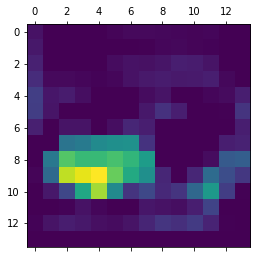

In [11]:
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [12]:
import cv2
img=cv2.imread(img_path)
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img=heatmap*0.4 + img
cv2.imwrite('/home/bagrat/Рабочий стол/Bankoboev.Ru_81758.jpg', superimposed_img)

True